# Redes Neuronales: Clasificador de medios de transporte.
En esta práctica vamos a hacer una red neuronal que sea capaz de clasificar medios de transporte, para ello utilizaremos un dataset con más de 3000 imágenes (Bicicleta, coches, motos, barco, avión) las cuales hemos descargado de distintas páginas de internet, a partir de las cuales hemos seleccionado aquellas más válidas para realizar nuestra práctica.

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time
from PIL import ImageFile
from keras.utils import plot_model

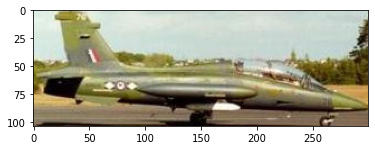

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dataset/Entrenamiento/1/airplane_0000.jpg', 'r')
imshow(np.asarray(pil_im))

Definimos las caracteristicas del generador de imágenes, tanto de entrenamiento como de test. Las cargamos desde el directorio, le ponemos un tamaño, el número de batch y le ponemos "class_mode = categorial" porque en este caso tenemos más de dos clases. Esto lo hacemos tanto para los datos de entrenamiento como para los de test.

In [ ]:

batch_size = 32

train_data_dir = '/content/drive/My Drive/dataset/Entrenamiento/'
validation_data_dir = '/content/drive/My Drive/dataset/Test/'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2, #inclinacion de la imagen
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(200, 200),
        batch_size=batch_size,
        shuffle=True,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(200, 200),
        batch_size=32,
        shuffle=True,
        class_mode='categorical')

Found 4255 images belonging to 5 classes.
Found 4244 images belonging to 5 classes.


**Modelo 1 CNN_64, Pool, CNN_64, Pool, CNN_128, FC_128**

Probamos con un modelo de pocas capas y pocos filtros, dos de 64 y uno de 128. En este caso la prueba se hace con la función de mínimos cuadrados y el optimizador Adam. Obtenemos un muy buen resultado, será el mejor de todos los modelos.

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 


model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 20s - loss: 0.1286 - accuracy: 0.4909 - val_loss: 0.1024 - val_accuracy: 0.6019
Epoch 2/15
50/50 - 20s - loss: 0.0846 - accuracy: 0.6842 - val_loss: 0.0661 - val_accuracy: 0.7650
Epoch 3/15
50/50 - 20s - loss: 0.0628 - accuracy: 0.7824 - val_loss: 0.0482 - val_accuracy: 0.8419
Epoch 4/15
50/50 - 20s - loss: 0.0526 - accuracy: 0.8149 - val_loss: 0.0541 - val_accuracy: 0.8075
Epoch 5/15
50/50 - 20s - loss: 0.0481 - accuracy: 0.8418 - val_loss: 0.0539 - val_accuracy: 0.8087
Epoch 6/15
50/50 - 20s - loss: 0.0366 - accuracy: 0.8806 - val_loss: 0.0352 - val_accuracy: 0.8775
Epoch 7/15
50/50 - 21s - loss: 0.0340 - accuracy: 0.8844 - val_loss: 0.0368 - val_accuracy: 0.8769
Epoch 8/15
50/50 - 20s - loss: 0.0375 - accuracy: 0.8781 - val_loss: 0.0564 - val_accuracy: 0.8206
Epoch 9/15
50/50 - 20s - loss: 0.0323 - accuracy: 0.8943 - val_loss: 0.0468 - val_accuracy: 0.8413
Epoch 10/15
50/50 - 20s - loss: 0.0274 - accuracy: 0.9119 - val_loss: 0.0343 - val_accuracy: 0.8788
Epoch 11/

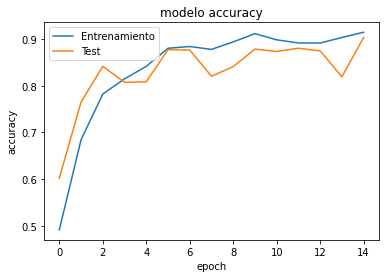

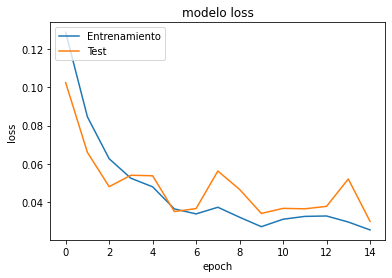

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Tenemos la misma configuración de capas, pero en este caso cambiamos la funcion loss de mínimos cuadrados por la de crossentropy. El resultado también es bueno, aunque no tanto como el anterior.

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 23s - loss: 1.3726 - accuracy: 0.4625 - val_loss: 0.8697 - val_accuracy: 0.6350
Epoch 2/15
50/50 - 21s - loss: 0.8102 - accuracy: 0.7098 - val_loss: 0.5956 - val_accuracy: 0.7850
Epoch 3/15
50/50 - 22s - loss: 0.5773 - accuracy: 0.8000 - val_loss: 0.4623 - val_accuracy: 0.8406
Epoch 4/15
50/50 - 21s - loss: 0.5070 - accuracy: 0.8250 - val_loss: 0.4652 - val_accuracy: 0.8288
Epoch 5/15
50/50 - 20s - loss: 0.4343 - accuracy: 0.8475 - val_loss: 0.3060 - val_accuracy: 0.8994
Epoch 6/15
50/50 - 20s - loss: 0.3724 - accuracy: 0.8731 - val_loss: 0.3311 - val_accuracy: 0.8906
Epoch 7/15
50/50 - 21s - loss: 0.2848 - accuracy: 0.9062 - val_loss: 0.4218 - val_accuracy: 0.8794
Epoch 8/15
50/50 - 20s - loss: 0.2818 - accuracy: 0.9106 - val_loss: 0.3262 - val_accuracy: 0.8938
Epoch 9/15
50/50 - 20s - loss: 0.2847 - accuracy: 0.9087 - val_loss: 0.2778 - val_accuracy: 0.9112
Epoch 10/15
50/50 - 20s - loss: 0.2788 - accuracy: 0.9050 - val_loss: 0.2568 - val_accuracy: 0.9169
Epoch 11/

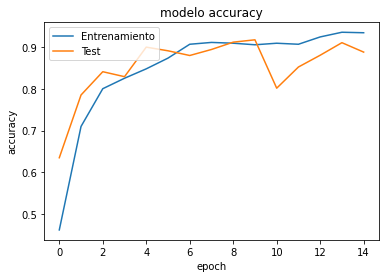

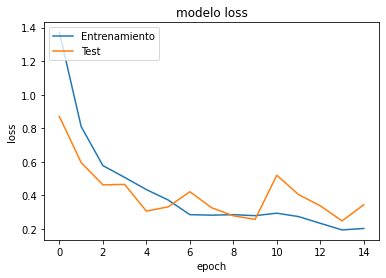

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

**Modelo 2 CNN_128, Pool, CNN_192, Pool, CNN_128, CNN_128**

En este caso segundo modelo tenemos el mismo número de capas que en el modelo 1, pero aumentamos el tamaño de los filtros, en este caso son de 128 y 192. Probando con función loss 'mse' y un optimizador Adam. El resultado es bueno.

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(192, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 

model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 21s - loss: 0.1395 - accuracy: 0.4606 - val_loss: 0.1095 - val_accuracy: 0.6350
Epoch 2/15
50/50 - 22s - loss: 0.0890 - accuracy: 0.6692 - val_loss: 0.0719 - val_accuracy: 0.7269
Epoch 3/15
50/50 - 21s - loss: 0.0598 - accuracy: 0.7942 - val_loss: 0.0706 - val_accuracy: 0.7444
Epoch 4/15
50/50 - 21s - loss: 0.0490 - accuracy: 0.8319 - val_loss: 0.0578 - val_accuracy: 0.7944
Epoch 5/15
50/50 - 21s - loss: 0.0460 - accuracy: 0.8469 - val_loss: 0.0501 - val_accuracy: 0.8138
Epoch 6/15
50/50 - 21s - loss: 0.0427 - accuracy: 0.8549 - val_loss: 0.0427 - val_accuracy: 0.8550
Epoch 7/15
50/50 - 21s - loss: 0.0344 - accuracy: 0.8869 - val_loss: 0.0554 - val_accuracy: 0.7969
Epoch 8/15
50/50 - 21s - loss: 0.0383 - accuracy: 0.8706 - val_loss: 0.0420 - val_accuracy: 0.8575
Epoch 9/15
50/50 - 21s - loss: 0.0400 - accuracy: 0.8637 - val_loss: 0.0614 - val_accuracy: 0.7925
Epoch 10/15
50/50 - 21s - loss: 0.0298 - accuracy: 0.9006 - val_loss: 0.0411 - val_accuracy: 0.8631
Epoch 11/

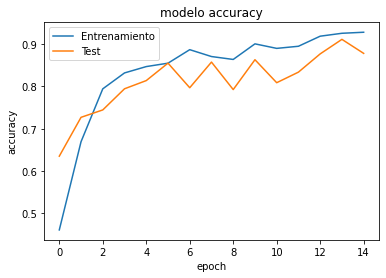

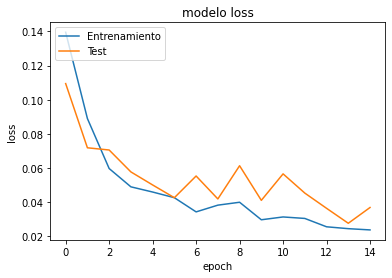

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

La misma configuración anterior, excepto que variamos la función loss por crossentropy, podemos observar que el resultado mejora a la anterior versión del modelo 2.

In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(192, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))


model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 21s - loss: 1.5721 - accuracy: 0.4125 - val_loss: 1.2327 - val_accuracy: 0.4475
Epoch 2/15
50/50 - 21s - loss: 1.0890 - accuracy: 0.5813 - val_loss: 0.8579 - val_accuracy: 0.6844
Epoch 3/15
50/50 - 21s - loss: 0.7419 - accuracy: 0.7381 - val_loss: 0.5537 - val_accuracy: 0.8150
Epoch 4/15
50/50 - 21s - loss: 0.6106 - accuracy: 0.7850 - val_loss: 0.4658 - val_accuracy: 0.8487
Epoch 5/15
50/50 - 21s - loss: 0.5216 - accuracy: 0.8236 - val_loss: 0.4600 - val_accuracy: 0.8413
Epoch 6/15
50/50 - 21s - loss: 0.4100 - accuracy: 0.8655 - val_loss: 0.4024 - val_accuracy: 0.8512
Epoch 7/15
50/50 - 21s - loss: 0.3922 - accuracy: 0.8693 - val_loss: 0.3304 - val_accuracy: 0.8731
Epoch 8/15
50/50 - 21s - loss: 0.3530 - accuracy: 0.8894 - val_loss: 0.4450 - val_accuracy: 0.8450
Epoch 9/15
50/50 - 21s - loss: 0.3227 - accuracy: 0.8925 - val_loss: 0.3379 - val_accuracy: 0.8881
Epoch 10/15
50/50 - 21s - loss: 0.2993 - accuracy: 0.8950 - val_loss: 0.4281 - val_accuracy: 0.8681
Epoch 11/

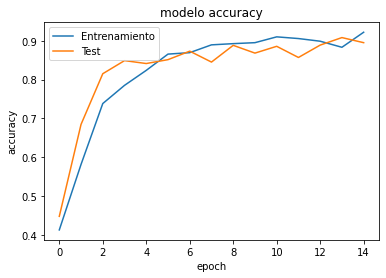

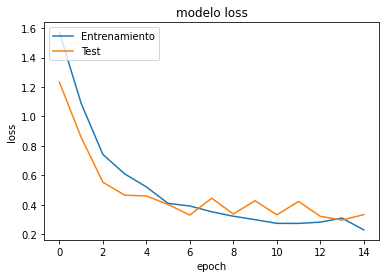

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

**Modelo 3 CNN_64, CNN_64, Pool, CNN_128, Pool, CNN_64, CNN_64, FC_128**

En el modelo 3, aumentamos las capas a 5 y reducimos el tamaño de filtros utilizados, en este caso 4 capas de 64 filtros y 1 capa de 128. Función de loss 'mse' y optimizador Adam.

In [ ]:
model = Sequential() 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))




model.compile(loss='mse',
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 22s - loss: 0.1378 - accuracy: 0.4431 - val_loss: 0.1320 - val_accuracy: 0.5181
Epoch 2/15
50/50 - 22s - loss: 0.1067 - accuracy: 0.6031 - val_loss: 0.0976 - val_accuracy: 0.6750
Epoch 3/15
50/50 - 22s - loss: 0.0909 - accuracy: 0.6706 - val_loss: 0.0698 - val_accuracy: 0.7606
Epoch 4/15
50/50 - 22s - loss: 0.0686 - accuracy: 0.7573 - val_loss: 0.0638 - val_accuracy: 0.7844
Epoch 5/15
50/50 - 21s - loss: 0.0553 - accuracy: 0.8136 - val_loss: 0.0780 - val_accuracy: 0.7056
Epoch 6/15
50/50 - 21s - loss: 0.0495 - accuracy: 0.8368 - val_loss: 0.0518 - val_accuracy: 0.8306
Epoch 7/15
50/50 - 22s - loss: 0.0470 - accuracy: 0.8375 - val_loss: 0.0482 - val_accuracy: 0.8350
Epoch 8/15
50/50 - 21s - loss: 0.0424 - accuracy: 0.8575 - val_loss: 0.0511 - val_accuracy: 0.8269
Epoch 9/15
50/50 - 21s - loss: 0.0385 - accuracy: 0.8669 - val_loss: 0.0525 - val_accuracy: 0.8225
Epoch 10/15
50/50 - 21s - loss: 0.0335 - accuracy: 0.8906 - val_loss: 0.0546 - val_accuracy: 0.8119
Epoch 11/

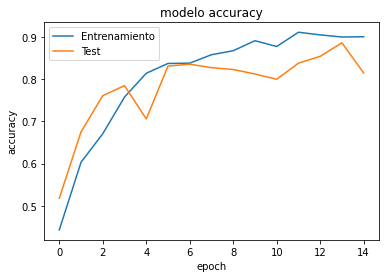

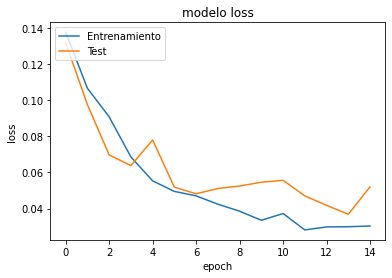

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Aquí comprobamos como actúa la misma configuración anterior pero en este caso con un optimizador SGD, vemos que el resultado es mucho peor.

In [ ]:
model = Sequential() 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3))) 
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax'))



model.compile(loss='mse',
              optimizer=keras.optimizers.SGD(lr=0.0005),
              metrics=['accuracy'])


history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2, 
      shuffle=True 
)

Epoch 1/15
50/50 - 21s - loss: 0.1573 - accuracy: 0.3525 - val_loss: 0.1550 - val_accuracy: 0.4575
Epoch 2/15
50/50 - 21s - loss: 0.1554 - accuracy: 0.3681 - val_loss: 0.1527 - val_accuracy: 0.4563
Epoch 3/15
50/50 - 21s - loss: 0.1535 - accuracy: 0.3759 - val_loss: 0.1503 - val_accuracy: 0.4569
Epoch 4/15
50/50 - 21s - loss: 0.1525 - accuracy: 0.3594 - val_loss: 0.1480 - val_accuracy: 0.4688
Epoch 5/15
50/50 - 22s - loss: 0.1512 - accuracy: 0.3544 - val_loss: 0.1461 - val_accuracy: 0.4619
Epoch 6/15
50/50 - 21s - loss: 0.1500 - accuracy: 0.3694 - val_loss: 0.1438 - val_accuracy: 0.4750
Epoch 7/15
50/50 - 21s - loss: 0.1477 - accuracy: 0.3819 - val_loss: 0.1435 - val_accuracy: 0.4569
Epoch 8/15
50/50 - 21s - loss: 0.1493 - accuracy: 0.3450 - val_loss: 0.1434 - val_accuracy: 0.4425
Epoch 9/15
50/50 - 21s - loss: 0.1474 - accuracy: 0.3638 - val_loss: 0.1416 - val_accuracy: 0.4563
Epoch 10/15
50/50 - 21s - loss: 0.1474 - accuracy: 0.3650 - val_loss: 0.1408 - val_accuracy: 0.4538
Epoch 11/

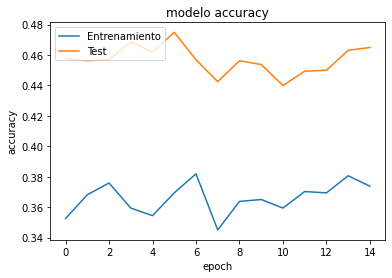

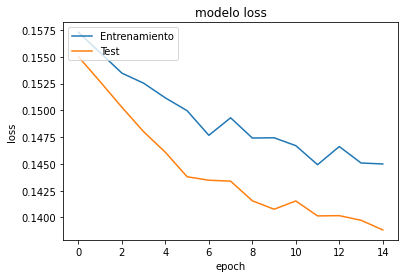

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

**Modelo 4 CNN_128, Pool, CNN_256, Pool, CNN_256, CNN_128, FC_128**

En este último modelo disminuimos en uno el número de capas, pero aumentamos el tamaño de los filtros, que en este caso serán de 128 y 256. Con función de loss crossentropy y un optimizador Adam. En este último modelo también aumentamos el número de épocas para comprobar si obtenemos mejores resultados.

In [ ]:
model = Sequential() 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.0005),
              metrics=['accuracy'])


#Entrenamos la red a partir de un generador de imágenes.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2,
      shuffle=True
)

Epoch 1/20
50/50 - 22s - loss: 1.7321 - accuracy: 0.3340 - val_loss: 1.3868 - val_accuracy: 0.4744
Epoch 2/20
50/50 - 22s - loss: 1.3864 - accuracy: 0.4406 - val_loss: 1.4587 - val_accuracy: 0.4381
Epoch 3/20
50/50 - 22s - loss: 1.1478 - accuracy: 0.5672 - val_loss: 1.1239 - val_accuracy: 0.5750
Epoch 4/20
50/50 - 22s - loss: 0.9997 - accuracy: 0.6354 - val_loss: 0.8576 - val_accuracy: 0.7275
Epoch 5/20
50/50 - 21s - loss: 0.8052 - accuracy: 0.7237 - val_loss: 0.7185 - val_accuracy: 0.7862
Epoch 6/20
50/50 - 21s - loss: 0.6103 - accuracy: 0.7950 - val_loss: 0.4649 - val_accuracy: 0.8537
Epoch 7/20
50/50 - 21s - loss: 0.5905 - accuracy: 0.7986 - val_loss: 0.3969 - val_accuracy: 0.8756
Epoch 8/20
50/50 - 21s - loss: 0.5339 - accuracy: 0.8249 - val_loss: 0.5656 - val_accuracy: 0.8006
Epoch 9/20
50/50 - 21s - loss: 0.5234 - accuracy: 0.8306 - val_loss: 0.4788 - val_accuracy: 0.8300
Epoch 10/20
50/50 - 21s - loss: 0.4586 - accuracy: 0.8456 - val_loss: 0.3642 - val_accuracy: 0.8938
Epoch 11/

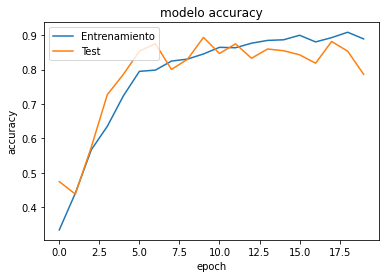

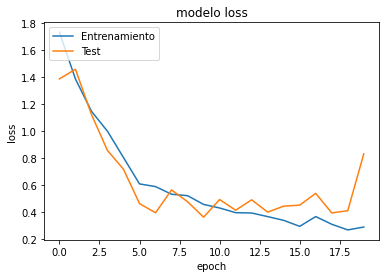

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Aquí tenemos la misma configuración del modelo 4, pero probamos con el optimizador SGD. Comprobamos nuevamente que el resultado es peor que el anterior.

In [ ]:
model = Sequential() 
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(200, 200, 3))) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

model.add(Dropout(0.25)) 
model.add(Flatten()) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.4))
model.add(Dense(5, activation = 'softmax')) 


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0005),
              metrics=['accuracy'])


#Entrenamos la red a partir de un generador de imágenes.
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2,
      shuffle=True
)

Epoch 1/20
50/50 - 21s - loss: 1.5406 - accuracy: 0.3675 - val_loss: 1.4229 - val_accuracy: 0.4712
Epoch 2/20
50/50 - 21s - loss: 1.4480 - accuracy: 0.3844 - val_loss: 1.3695 - val_accuracy: 0.4588
Epoch 3/20
50/50 - 21s - loss: 1.4419 - accuracy: 0.3931 - val_loss: 1.3545 - val_accuracy: 0.4669
Epoch 4/20
50/50 - 21s - loss: 1.4268 - accuracy: 0.4125 - val_loss: 1.3730 - val_accuracy: 0.4787
Epoch 5/20
50/50 - 21s - loss: 1.4117 - accuracy: 0.4440 - val_loss: 1.3671 - val_accuracy: 0.4863
Epoch 6/20
50/50 - 21s - loss: 1.3950 - accuracy: 0.4588 - val_loss: 1.3455 - val_accuracy: 0.4819
Epoch 7/20
50/50 - 21s - loss: 1.3671 - accuracy: 0.4772 - val_loss: 1.3328 - val_accuracy: 0.4769
Epoch 8/20
50/50 - 21s - loss: 1.3523 - accuracy: 0.4844 - val_loss: 1.3294 - val_accuracy: 0.4975
Epoch 9/20
50/50 - 21s - loss: 1.3093 - accuracy: 0.5147 - val_loss: 1.3482 - val_accuracy: 0.4663
Epoch 10/20
50/50 - 21s - loss: 1.3065 - accuracy: 0.5050 - val_loss: 1.3273 - val_accuracy: 0.4863
Epoch 11/

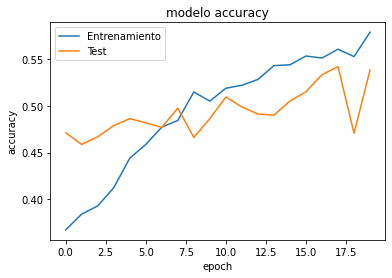

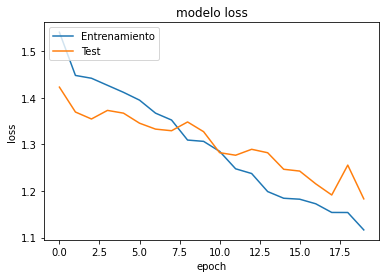

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('modelo accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('modelo loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

Guardamos los pesos correspondientes al mejor modelo, que en nuestra red se corresponde con la primera versión del primer modelo.

In [ ]:
model.save_weights('/content/drive/My Drive/dataset/Mediosdetransporte/Transporte_CNN.h5')


In [ ]:
model.load_weights('/content/drive/My Drive/dataset/Mediosdetransporte/Transporte_CNN.h5')

Probamos con algunas imágenes hechas por nosotros y comprobamos si las clasifica correctamente.

(200, 200, 3)
['Coche', 'Avion', 'Moto', 'Bicicleta', 'Barco']


array([[1., 0., 0., 0., 0.]], dtype=float32)

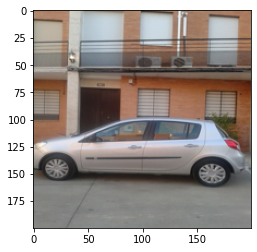

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dataset/imagenes/1458660_544548065613740_653592635_n.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Coche','Avion','Moto','Bicicleta', 'Barco'])
im = im.reshape(1,200,200,3)
model.predict(im)

(200, 200, 3)
['Coche', 'Avion', 'Moto', 'Bicicleta', 'Barco']


array([[0., 1., 0., 0., 0.]], dtype=float32)

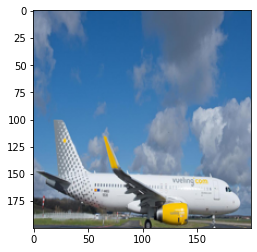

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dataset/imagenes/vueling.jpeg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Coche','Avion','Moto','Bicicleta', 'Barco'])
im = im.reshape(1,200,200,3)
model.predict(im)

(200, 200, 3)
['Coche', 'Avion', 'Moto', 'Bicicleta', 'Barco']


array([[0., 0., 0., 0., 1.]], dtype=float32)

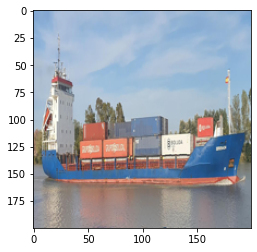

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dataset/imagenes/barcocoria.jpeg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Coche','Avion','Moto','Bicicleta', 'Barco'])
im = im.reshape(1,200,200,3)
model.predict(im)

(200, 200, 3)
['Coche', 'Avion', 'Moto', 'Bicicleta', 'Barco']


array([[0., 0., 0., 1., 0.]], dtype=float32)

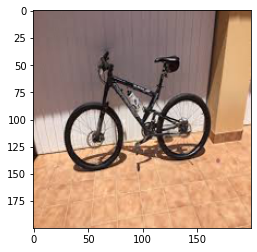

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import keras

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/dataset/imagenes/bicicletas.jpg', 'r')
im = np.asarray(pil_im.resize((200, 200)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3
print(['Coche','Avion','Moto','Bicicleta', 'Barco'])
im = im.reshape(1,200,200,3)
model.predict(im)

# Conclusiones:
Después de haber probado las 4 configuraciones anteriores con sus variaciones en cada una, hay una la cual nos da los mejores resultados, se trata del modelo 1. En la que hemos conseguido un accuracy de casi el 91% y un error del 3%.
En el caso del modelo 1 hemos optado por un modelo con pocas capas y filtros pequeños. Tenemos 3 capas convolutivas de 64 y 128 filtros, y una capa MaxPool para reducir el tamaño de las imágenes resultantes.
Por último tenemos dos capas Drop del 25% y 40% para evitar overfitting, una capa densa de 128 neuronas y la última capa de salida con 5 neuronas que son las 5 clases que vamos a clasificar.

Finalmente, guardamos los pesos del mejor modelo y probamos con cuatro imágenes hechas por nosotros, y como podemos comprobar, nuestra red responde muy bien a cada una de ellas.

#Pregunta:
#Categorical cross entropy es una función de pérdida similar a la ya estudiada suma de diferencias al cuadrado. Explica cómo y por qué funciona esta función de pérdida.
Categorical cross entropy mide la diferencia entre dos distribuciones de probabilidad, y funciona porque entrenamos a la red para hacer que tenga como salida una distribución de probabilidad de las N clases que clasifica la red.